# 3장. Prophet 작동 원리

## Prophet 수식(The math behind Prophet)

### 선형 성장(Linear growth)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(42)  # set random seed for repeatability

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [ ]:
x = pd.to_datetime(pd.date_range('1995-01', '2004-02', freq='M').strftime("%Y-%b").tolist())
y = [1 / (1 + np.e ** (-.04 * (val - 50))) for val in range(len(x))]  # create logistic curve
y = [y[idx] + y[idx] * .1 * np.sin((idx - 2) * (360 / 12) * (np.pi / 180)) for idx in range(len(y))]  # add sinusoidal variation
y = [int(500 * val) for val in y]  # scale up

df = pd.DataFrame({'ds': pd.to_datetime(x), 'y': y})

<ipython-input-2-4d5678dc5f7b>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  x = pd.to_datetime(pd.date_range('1995-01', '2004-02', freq='M').strftime("%Y-%b").tolist())
<ipython-input-2-4d5678dc5f7b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x = pd.to_datetime(pd.date_range('1995-01', '2004-02', freq='M').strftime("%Y-%b").tolist())


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9cq52fdx/ny65mmu5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9cq52fdx/deenr7_l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5770', 'data', 'file=/tmp/tmp9cq52fdx/ny65mmu5.json', 'init=/tmp/tmp9cq52fdx/deenr7_l.json', 'output', 'file=/tmp/tmp9cq52fdx/prophet_model3f8wz8re/prophet_model-20250224115006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:50:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:50:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/p

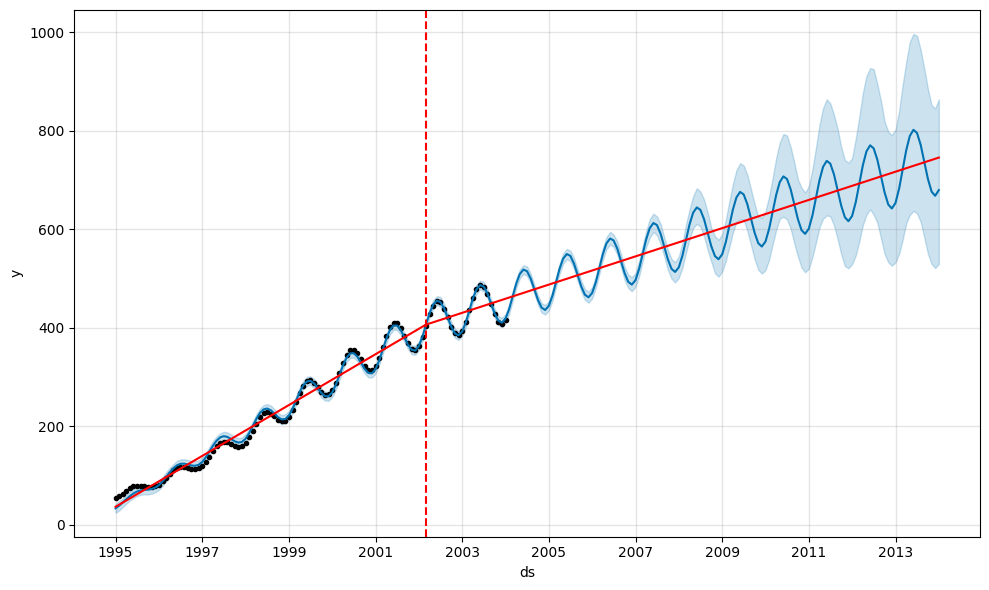

In [ ]:
model = Prophet(growth='linear',
                yearly_seasonality=3,
                seasonality_mode='multiplicative',
                n_changepoints=1)
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq='M')
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

### 로지스틱 성장(Logistic growth)

In [ ]:
df['cap'] = 500

In [ ]:
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq='M')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9cq52fdx/ckxq0hwa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9cq52fdx/c_krxdmz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7918', 'data', 'file=/tmp/tmp9cq52fdx/ckxq0hwa.json', 'init=/tmp/tmp9cq52fdx/c_krxdmz.json', 'output', 'file=/tmp/tmp9cq52fdx/prophet_modelzqi0myh1/prophet_model-20250224115013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:50:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:50:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/p

In [ ]:
future['cap'] = 500

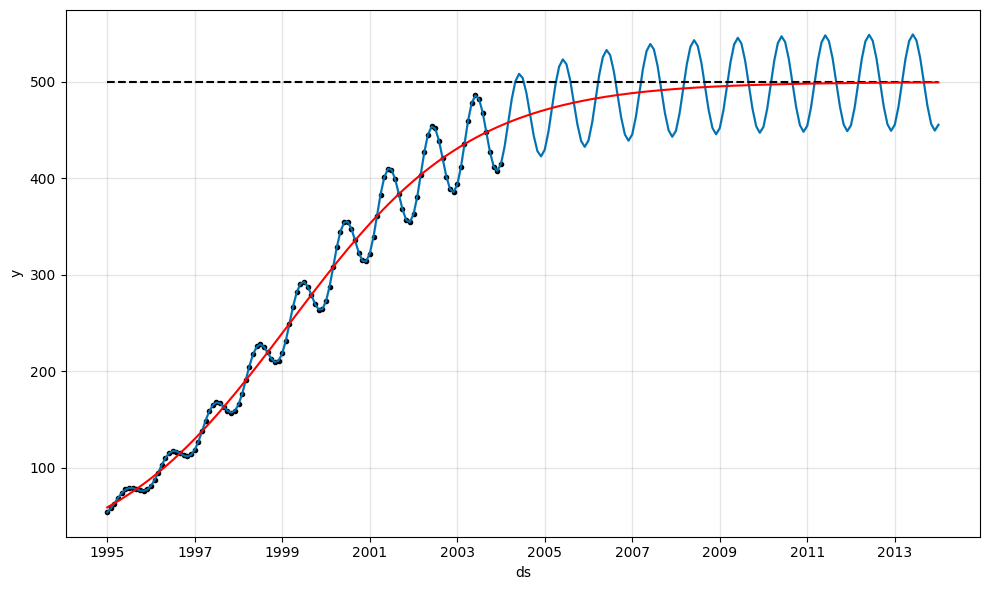

In [ ]:
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

In [ ]:
def set_cap(row, df):
    if row.year < 2007:
        return 500
    else:
        pop_2007 = 500
        idx_2007 = df[df['ds'].dt.year == 2007].index[0]
        idx_date = df[df['ds'] == row].index[0]
        return pop_2007 + 2 * (idx_date - idx_2007)

In [ ]:
df['cap'] = df['ds'].apply(set_cap, args=(df,))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9cq52fdx/_n08ti3y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9cq52fdx/ww4fik48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51925', 'data', 'file=/tmp/tmp9cq52fdx/_n08ti3y.json', 'init=/tmp/tmp9cq52fdx/ww4fik48.json', 'output', 'file=/tmp/tmp9cq52fdx/prophet_model24y0kt8h/prophet_model-20250224115027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:50:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:50:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

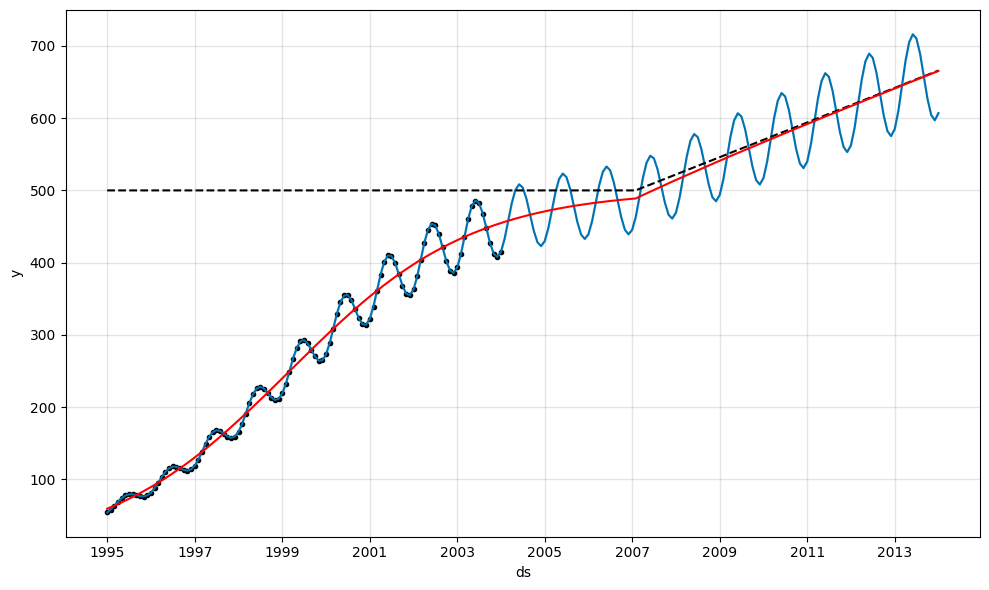

In [ ]:
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq='M')
future['cap'] = future['ds'].apply(set_cap, args=(future,))
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

### 계절성(Seasonality)

<ipython-input-11-b0eb42ec8b8b>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  x = pd.date_range('2000-01-01', '2001-01-01', freq='H')


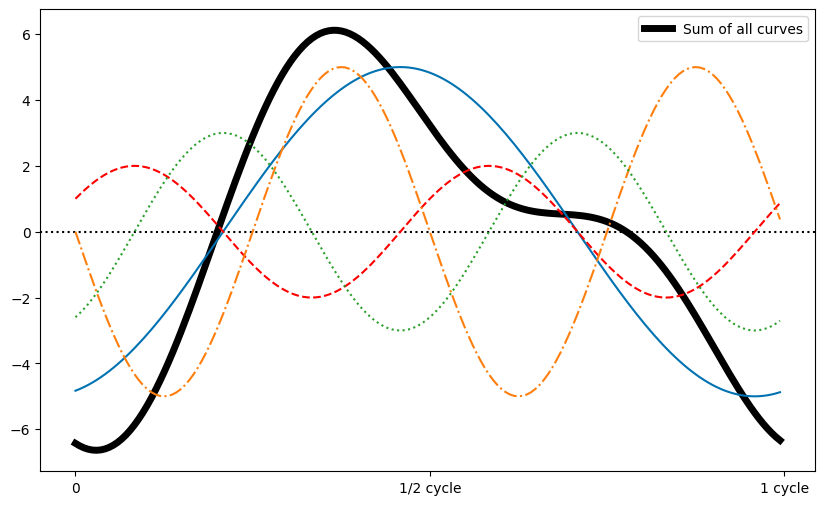

In [ ]:
x = pd.date_range('2000-01-01', '2001-01-01', freq='H')
x = range(24 * 7)
y0 = [(-5 * np.sin(((idx / 7) - 17) * (360 / 24) * (np.pi / 180))) for idx in range(len(x))]
y1 = [(-2 * np.sin(((idx / 7) - 5) * (360 / 12) * (np.pi / 180))) for idx in range(len(x))]
y2 = [(-5 * np.sin(((idx / 7) - 12) * (360 / 12) * (np.pi / 180))) for idx in range(len(x))]
y3 = [(-3 * np.sin(((idx / 7) - 20) * (360 / 12) * (np.pi / 180))) for idx in range(len(x))]
y = [y0[idx] + y1[idx] + y2[idx] + y3[idx] for idx in range(len(x))]

plt.figure(figsize=(10, 6))
plt.axhline(0, ls=':', c='k')
plt.plot(y, lw=5, c='k', label='Sum of all curves')
plt.plot(y0, c='#0072B2', ls='-')
plt.plot(y1, c='r', ls='--')
plt.plot(y2, c='tab:orange', ls='-.')
plt.plot(y3, c='tab:green', ls=':')
plt.legend()
plt.xticks(ticks=[0, 84, 168], labels=[0, '1/2 cycle', '1 cycle'])
plt.show()